In [1]:
## Finpro Stage 1 - EDA - installment payments

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [7]:
# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\Pongo\Desktop\dataset\home-credit-default-risk\application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Descriptive Statistics

In [9]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Pendekatan Numerik

In [11]:
# Pengelompokan kolom numerik dari dataset application_train
nums = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
        'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
        'DAYS_ID_PUBLISH']
# nums = numericals


In [19]:
data[nums].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,278202.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,367142.500000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,456255.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000


**Secara umum tipe datanya sudah sesuai isinya:**

Saran:<br>
kolom yang mungkin perlu diperbaiki adalah:<br>
**AMT_GOODS_PRICE** sebaiknya diperiksa untuk perubahan ke `int64` jika tidak ada angka desimal yang diperlukan (hanya 12 nilai yang memiliki desimal).<br>
Kolom terkait permintaan kredit seperti **AMT_REQ_CREDIT_BUREAU_DAY**, **AMT_REQ_CREDIT_BUREAU_WEEK**, **AMT_REQ_CREDIT_BUREAU_MON**, **AMT_REQ_CREDIT_BUREAU_QRT**, dan **AMT_REQ_CREDIT_BUREAU_YEAR** juga bisa diperiksa, tergantung apakah angka desimal tersebut signifikan atau tidak.<br>
Namun, kolom **AMT_CREDIT**, **AMT_ANNUITY**, dan **AMT_INCOME_TOTAL** memiliki banyak angka desimal, sehingga lebih baik tetap dibiarkan dalam format `float64`.


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [17]:
#Jumlah data yang null
data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Data yang memiliki nilai kosong ada pada **AMT_REQ_CREDIT_BUREAU_DAY**, **AMT_REQ_CREDIT_BUREAU_WEEK**, **AMT_REQ_CREDIT_BUREAU_MON**, **AMT_REQ_CREDIT_BUREAU_QRT**, dan **AMT_REQ_CREDIT_BUREAU_YEAR**.


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Berdasarkan summary statistik yang diberikan, berikut adalah beberapa observasi terkait nilai yang tampak aneh atau tidak umum:<br>

Kolom **AMT_INCOME_TOTAL**:<br>
Nilai maksimum sebesar 117 juta tampaknya sangat tinggi untuk total pendapatan seseorang. Sebaiknya periksa apakah nilai ini merupakan outlier atau kesalahan input data.<br>

Kolom **AMT_CREDIT**:<br>
Nilai maksimum sebesar 4,050,000 cukup tinggi, meskipun mungkin wajar untuk kredit dalam skala besar. Tetap perlu dicek apakah ada pola yang tidak biasa.<br>

Kolom **DAYS_BIRTH**:<br>
Nilai minimum -27,229 menunjukkan usia sekitar 74 tahun. Ini mungkin wajar, tetapi tetap perlu dikonfirmasi apakah ada kesalahan input data.<br>

Kolom **DAYS_EMPLOYED**:<br>
Nilai maksimum sebesar 365,243 hari (lebih dari 1,000 tahun) jelas merupakan outlier yang signifikan. Sebaiknya periksa kembali apakah ini merupakan kesalahan data atau anomali.<br>

Kolom **AMT_ANNUITY**:<br>
Nilai maksimum sebesar 258,025 tampaknya sangat tinggi untuk pembayaran tahunan. Sebaiknya periksa apakah ini merupakan kesalahan input atau memang pembayaran dalam skala besar.<br>

Kolom **DAYS_REGISTRATION** dan **DAYS_ID_PUBLISH**:<br>
Nilai minimum dari kedua kolom ini sangat negatif, hingga -24,672 hari. Ini mungkin normal jika merepresentasikan waktu yang sudah lama, tetapi tetap perlu diperiksa apakah ada kesalahan atau anomali dalam input data.<br>

Kesimpulan:<br>
- **AMT_INCOME_TOTAL** dengan nilai maksimum 117 juta mungkin perlu dievaluasi lebih lanjut.
- **DAYS_EMPLOYED** dengan nilai 365,243 hari sangat jelas merupakan anomali yang perlu diperiksa.
- **AMT_ANNUITY** dengan nilai maksimum sangat tinggi perlu diperiksa untuk mengetahui apakah ini memang pembayaran yang valid.
- **DAYS_BIRTH**, **DAYS_REGISTRATION**, dan **DAYS_ID_PUBLISH** dengan nilai sangat negatif patut diperiksa untuk memastikan konsistensi.


# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

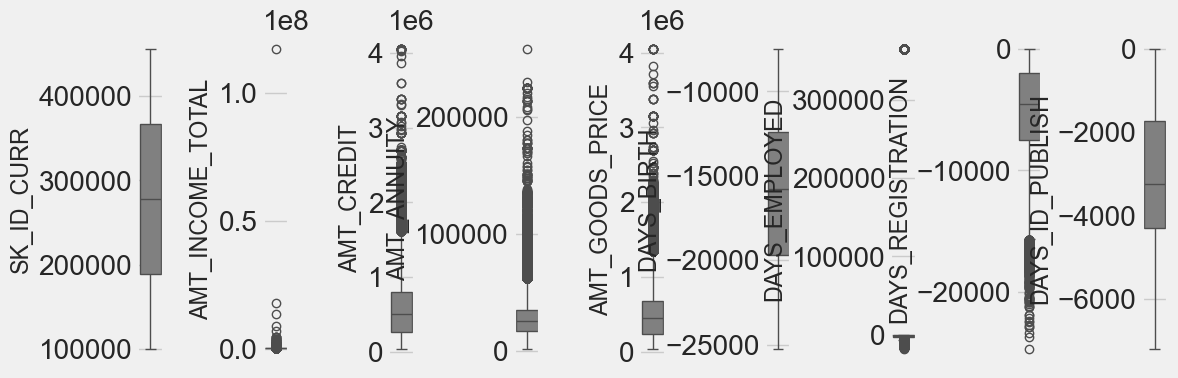

In [23]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**SK_ID_CURR**:  
Kolom ini menunjukkan distribusi ID unik. Karena ini hanya berfungsi sebagai pengidentifikasi, distribusi kolom ini tidak memiliki makna numerik yang signifikan dan tidak memerlukan follow-up lebih lanjut.

**AMT_INCOME_TOTAL**:  
Distribusi dari kolom ini tampak skewed ke kanan dengan beberapa outlier di sisi kanan. Beberapa nilai pendapatan sangat tinggi, yang bisa jadi outlier.  
*Follow-up*: Disarankan untuk memeriksa nilai-nilai pendapatan yang sangat tinggi untuk memastikan apakah ada kesalahan input data atau memang merupakan data valid.

**AMT_CREDIT**:  
Nilai kredit pada kolom ini juga tampak skewed ke kanan, dengan beberapa nilai yang jauh lebih besar dari rata-rata.  
*Follow-up*: Sebaiknya ditinjau lebih lanjut apakah nilai kredit yang sangat tinggi ini wajar atau merupakan anomali.

**AMT_ANNUITY**:  
Distribusi annuitas juga menunjukkan skewed ke kanan dengan beberapa outlier yang signifikan.  
*Follow-up*: Perlu dilakukan analisis lebih lanjut terhadap outlier ini, karena bisa jadi representasi dari pembayaran yang besar.

**AMT_GOODS_PRICE**:  
Distribusi harga barang juga skewed ke kanan, dengan beberapa harga barang yang sangat tinggi dibandingkan mayoritas data.  
*Follow-up*: Harga barang yang sangat tinggi ini perlu ditinjau apakah sesuai dengan data nyata atau merupakan outlier.

**DAYS_BIRTH**:  
Kolom ini menunjukkan distribusi yang simetris dengan kecenderungan nilai negatif, yang mencerminkan usia peserta. Tidak ada outlier yang signifikan untuk kolom ini.

**DAYS_EMPLOYED**:  
Distribusi pada kolom ini menunjukkan anomali besar dengan outlier ekstrem yang mencapai ratusan ribu hari bekerja, yang jelas tidak masuk akal.  
*Follow-up*: Disarankan untuk melakukan pengecekan ulang pada nilai-nilai outlier ini karena kemungkinan besar merupakan kesalahan input.

**DAYS_REGISTRATION dan DAYS_ID_PUBLISH**:  
Kedua kolom ini memiliki distribusi skewed negatif, yang menunjukkan durasi waktu yang sangat lama untuk registrasi dan publikasi ID. Tidak ada outlier signifikan, namun perlu diperiksa apakah nilai-nilai yang sangat rendah sesuai dengan konteks historis.

**Rekomendasi Pre-Processing**:
- Periksa outlier terutama pada kolom **AMT_INCOME_TOTAL**, **AMT_CREDIT**, dan **AMT_ANNUITY** untuk memastikan tidak ada kesalahan data.
- Lakukan normalisasi atau scaling pada kolom-kolom yang distribusinya skewed, seperti **AMT_CREDIT** dan **AMT_GOODS_PRICE**.
- Pertimbangkan transformasi seperti **log-transform** untuk kolom-kolom yang sangat skewed agar distribusi lebih normal dan mudah dianalisis lebih lanjut.


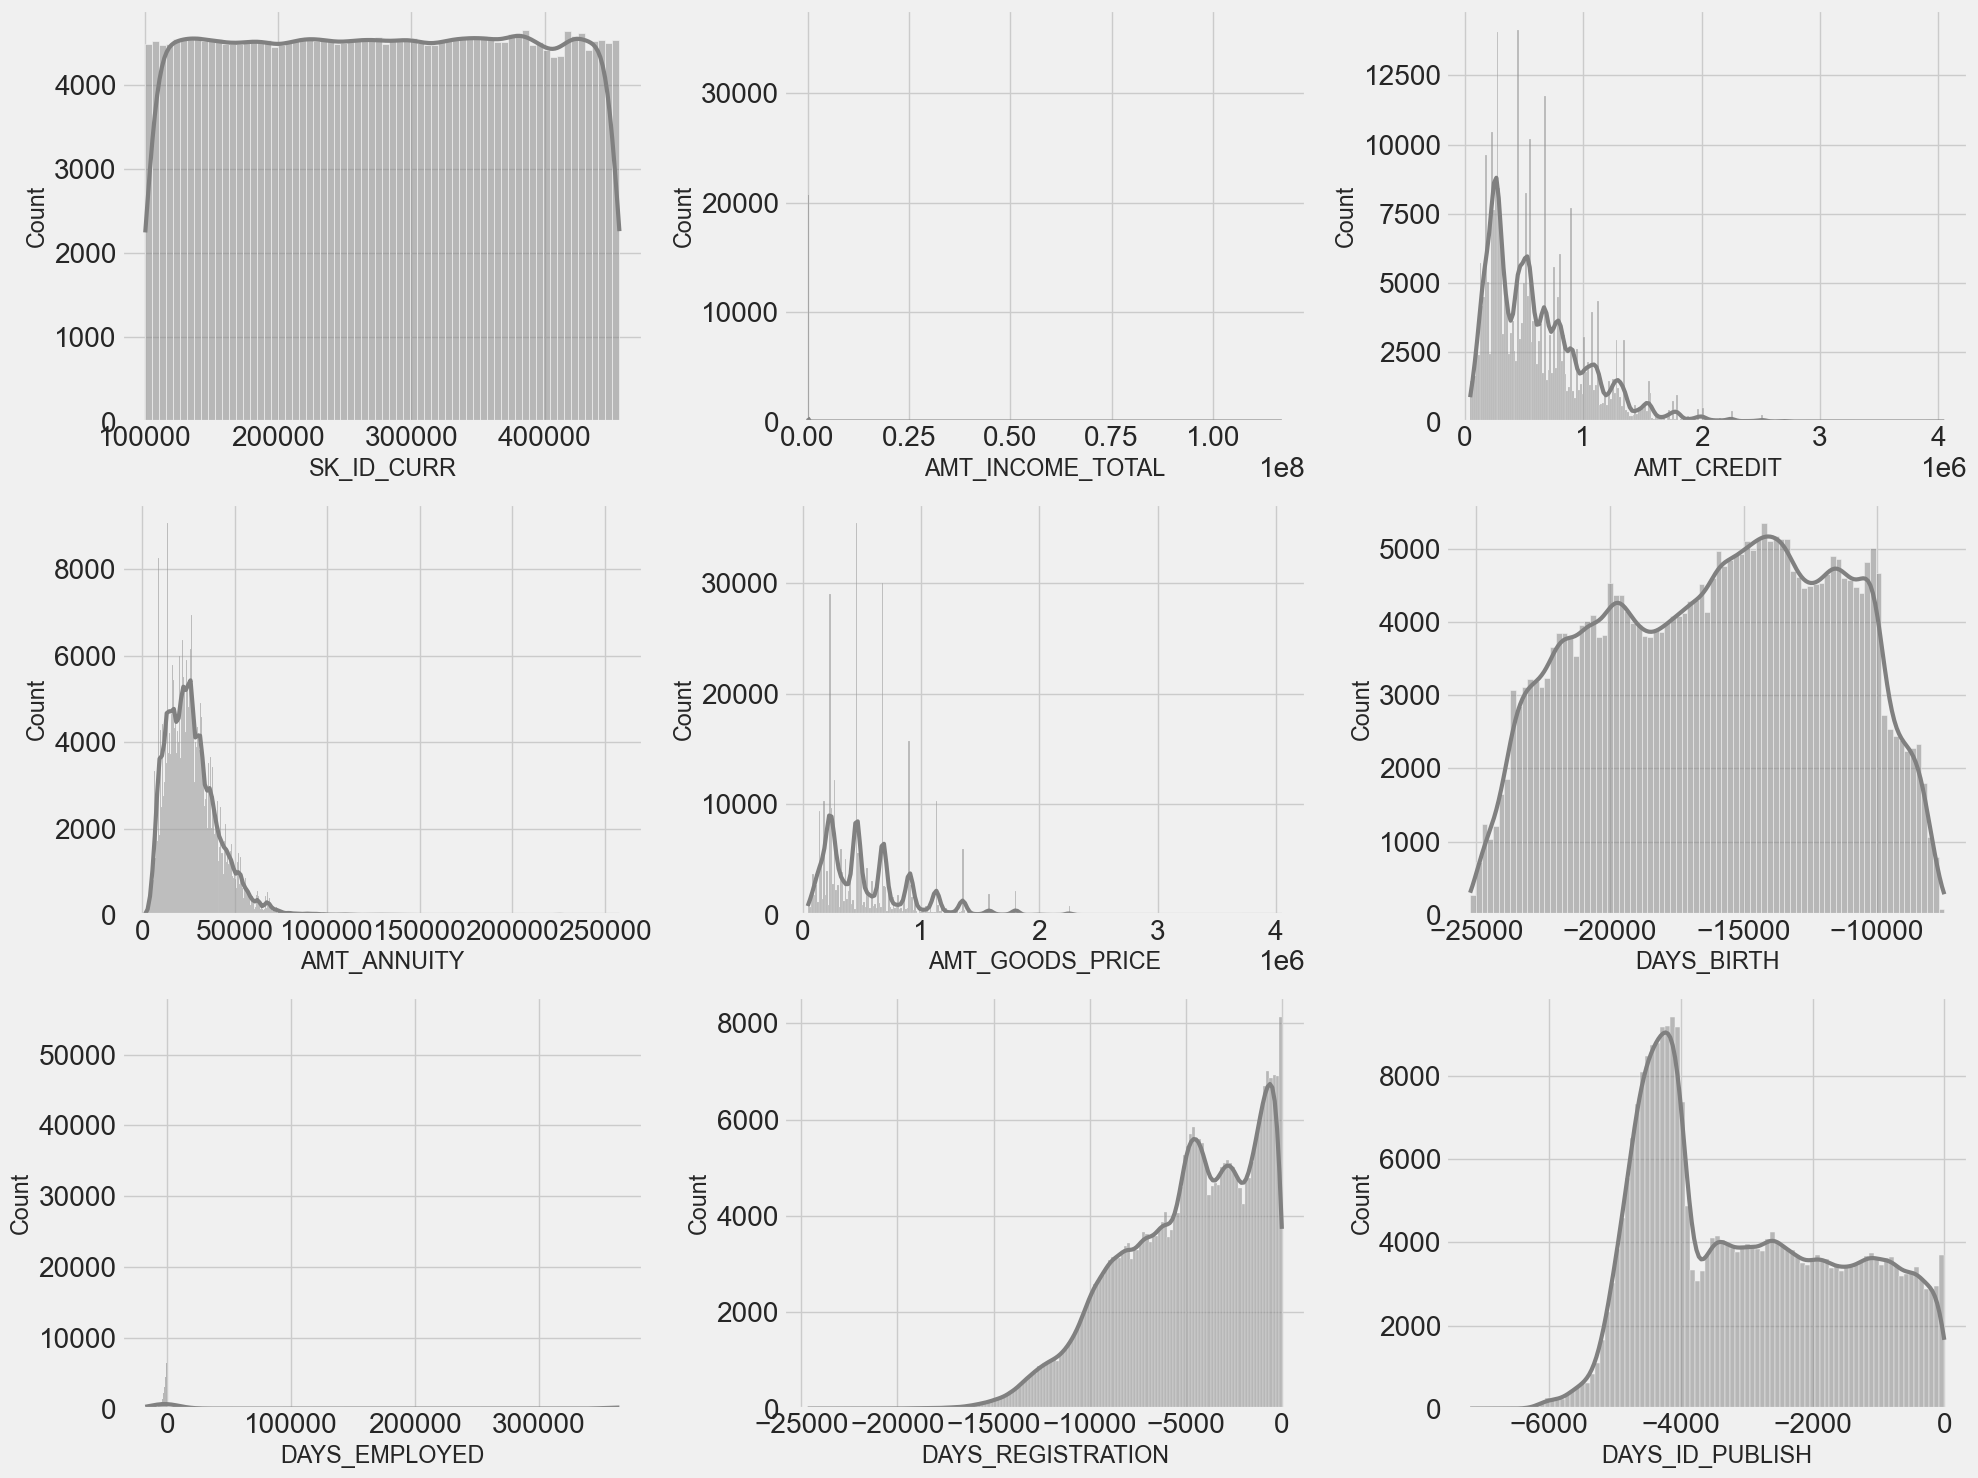

In [30]:
# Membuat figure dengan ukuran lebih besar
plt.figure(figsize=(20, 15))

# Loop untuk membuat plot distribusi setiap kolom di 'nums'
for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)  # Grid tetap 3 baris, 3 kolom
    sns.histplot(data[nums[i]], kde=True, color='gray')  # Menggunakan histplot + kde
    plt.tight_layout()

plt.show()


**SK_ID_CURR**:  
Distribusi ID pada kolom ini cenderung merata (flat), yang menunjukkan bahwa setiap ID memiliki frekuensi yang hampir sama. Karena kolom ini hanya berfungsi sebagai pengidentifikasi, tidak ada yang perlu di-follow up lebih lanjut.

**AMT_INCOME_TOTAL**:  
Distribusinya sangat skewed ke kanan, dengan mayoritas nilai berada pada rentang rendah, namun ada beberapa outlier di bagian kanan.  
*Follow-up*: Disarankan untuk memeriksa nilai pendapatan yang sangat tinggi untuk memastikan apakah ada kesalahan input atau memang data yang valid.

**AMT_CREDIT**:  
Distribusi kredit menunjukkan skewness ke kanan, dengan sebagian besar nilai berada di rentang yang lebih rendah, sementara terdapat outlier di bagian kanan.  
*Follow-up*: Lakukan pemeriksaan lebih lanjut pada outlier kredit ini untuk memastikan apakah data tersebut benar.

**AMT_ANNUITY**:  
Distribusi skewed ke kanan dengan beberapa outlier yang signifikan. Sebagian besar data terletak di rentang nilai kecil, tetapi ada beberapa nilai yang sangat besar yang perlu diperhatikan.  
*Follow-up*: Outlier-outlier ini harus ditinjau lebih lanjut untuk memastikan apakah mereka valid atau ada kesalahan input.

**AMT_GOODS_PRICE**:  
Distribusi harga barang menunjukkan skewness ke kanan, dengan sebagian besar nilai di bawah 1 juta, sementara terdapat beberapa outlier yang mencapai hingga 4 juta.  
*Follow-up*: Nilai barang yang sangat tinggi ini perlu diperiksa lebih lanjut untuk memastikan keabsahannya.

**DAYS_BIRTH**:  
Distribusi usia tampak simetris dan diukur dalam bentuk negatif (jumlah hari sebelum lahir). Sebagian besar data tersebar merata dan tidak ada outlier signifikan yang terlihat.

**DAYS_EMPLOYED**:  
Distribusinya sangat skewed ke kanan, dengan outlier signifikan di nilai yang sangat tinggi. Nilai yang mencapai lebih dari 300,000 hari jelas merupakan anomali atau kesalahan input.  
*Follow-up*: Lakukan analisis lebih mendalam pada outlier ini untuk memverifikasi validitas data.

**DAYS_REGISTRATION dan DAYS_ID_PUBLISH**:  
Distribusi kedua kolom ini menunjukkan skewness ke kiri, dengan rentang yang panjang dari -25,000 hingga 0. Rentang yang panjang ini mungkin relevan dengan konteks historis terkait registrasi dan publikasi ID.  
*Follow-up*: Tidak ada tindakan signifikan yang diperlukan selain memvalidasi beberapa nilai yang sangat negatif.

---

**Rekomendasi Pre-Processing**:
- Lakukan transformasi log pada kolom **AMT_INCOME_TOTAL**, **AMT_CREDIT**, dan **AMT_ANNUITY** untuk menangani skewness.
- Periksa outlier pada kolom **DAYS_EMPLOYED** karena kemungkinan besar merupakan kesalahan input data.
- Lakukan verifikasi pada outlier di kolom **AMT_GOODS_PRICE** dan **AMT_ANNUITY** untuk memastikan apakah data valid atau memerlukan penanganan lebih lanjut.


## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




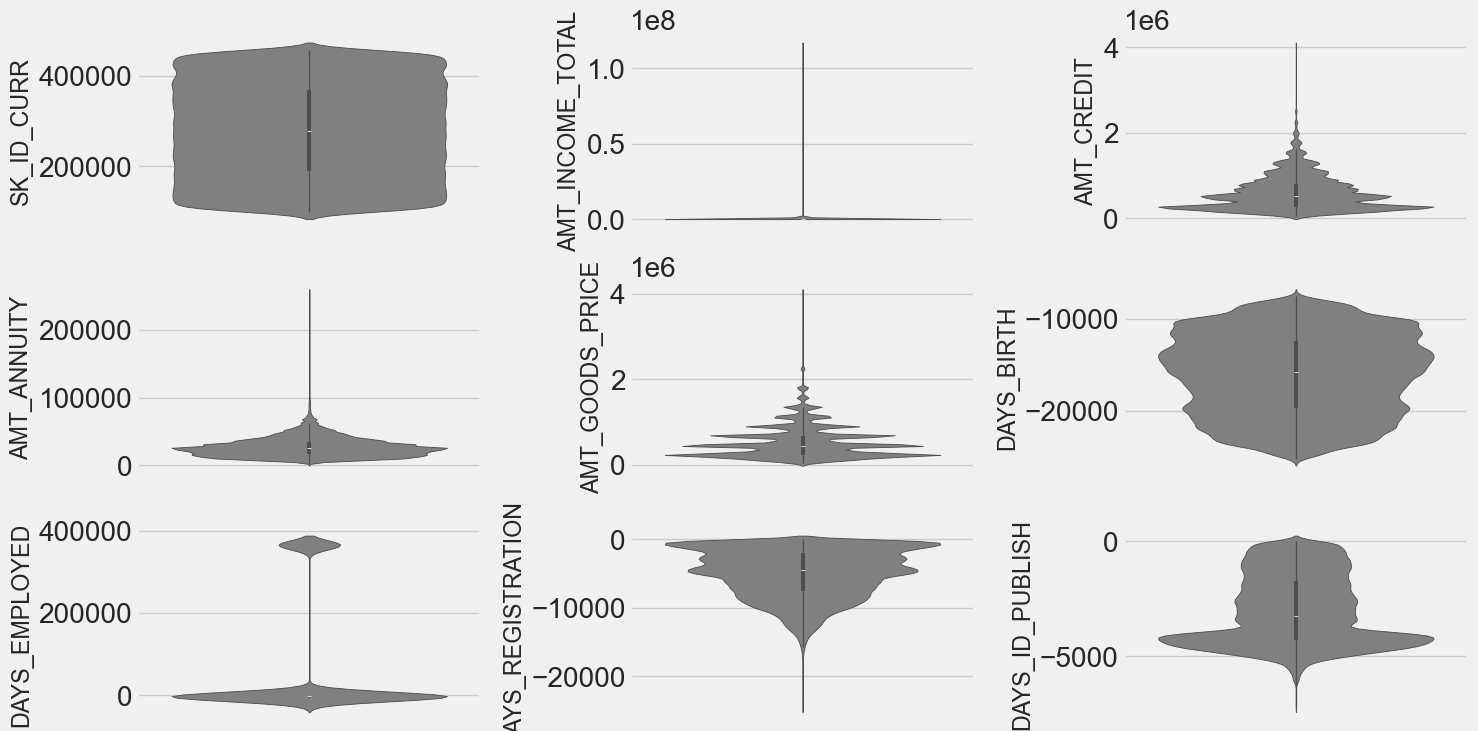

In [34]:
# Daftar kolom numerik
nums = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
        'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
        'DAYS_ID_PUBLISH']

# Menentukan jumlah kolom per baris
columns_per_row = 3

# Menghitung jumlah baris yang diperlukan
rows = (len(nums) // columns_per_row) + 1

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(15, 10))

# Loop untuk membuat plot violin untuk setiap kolom di 'nums'
for i in range(0, len(nums)):
    plt.subplot(rows, columns_per_row, i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

plt.show()


**SK_ID_CURR**:  
Distribusi untuk kolom ini terlihat cukup merata dan simetris, seperti yang diharapkan dari sebuah identifier. Karena ini hanya berfungsi sebagai pengidentifikasi, tidak ada tindakan lebih lanjut yang perlu dilakukan.

**AMT_INCOME_TOTAL**:  
Distribusinya sangat skewed ke kanan, dengan sebagian besar nilai berada di rentang rendah dan beberapa outlier di bagian kanan.  
*Follow-up*: Perlu diperiksa lebih lanjut apakah nilai-nilai pendapatan yang sangat tinggi adalah valid atau outlier.

**AMT_CREDIT**:  
Distribusi juga skewed ke kanan, dengan mayoritas nilai di bagian rendah dan beberapa outlier di bagian kanan.  
*Follow-up*: Sebaiknya dilakukan pemeriksaan pada nilai kredit yang sangat besar untuk memverifikasi validitasnya.

**AMT_ANNUITY**:  
Distribusi skewed ke kanan dengan banyak nilai rendah dan beberapa outlier di bagian atas.  
*Follow-up*: Nilai-nilai outlier ini perlu diperiksa lebih lanjut untuk memastikan apakah data tersebut valid atau merupakan kesalahan input.

**AMT_GOODS_PRICE**:  
Distribusi harga barang juga skewed ke kanan, dengan sebagian besar harga berada di bawah 1 juta, tetapi terdapat beberapa outlier yang sangat tinggi (hingga 4 juta).  
*Follow-up*: Perlu dilakukan pengecekan pada harga barang yang sangat tinggi untuk memastikan data tersebut benar.

**DAYS_BIRTH**:  
Distribusi tampak simetris dan mencerminkan rentang usia dengan baik. Tidak ada outlier yang signifikan, sehingga tidak ada tindak lanjut yang diperlukan di sini.

**DAYS_EMPLOYED**:  
Distribusi skewed ke kanan dengan outlier di bagian atas yang tampaknya sangat tidak realistis. Beberapa nilai yang mencapai lebih dari 300,000 hari jelas merupakan kesalahan data.  
*Follow-up*: Outlier ini perlu diperiksa lebih lanjut untuk memastikan bahwa tidak ada kesalahan input.

**DAYS_REGISTRATION dan DAYS_ID_PUBLISH**:  
Kedua kolom ini menunjukkan distribusi skewed ke kiri, dengan sebagian besar data berpusat pada nilai negatif. Nilai negatif ini merepresentasikan waktu registrasi yang jauh di masa lalu.  
*Tidak ada follow-up signifikan*, namun beberapa nilai negatif yang ekstrim mungkin perlu diperiksa lebih lanjut untuk validitas.

---

**Rekomendasi Pre-Processing**:
- Perlu dilakukan analisis lebih lanjut terhadap outlier di kolom **AMT_INCOME_TOTAL**, **AMT_CREDIT**, **AMT_ANNUITY**, dan **AMT_GOODS_PRICE**.
- Pertimbangkan untuk melakukan transformasi log pada kolom yang distribusinya sangat skewed ke kanan, seperti **AMT_CREDIT**, **AMT_ANNUITY**, dan **AMT_GOODS_PRICE**.
- Lakukan verifikasi lebih lanjut pada outlier di kolom **DAYS_EMPLOYED** untuk memastikan tidak ada kesalahan input.


## Kesimpulan Univariate Analysis

Berdasarkan grafik-grafik yang telah dianalisis, berikut adalah beberapa kesimpulan utama:

1. **Distribusi Skewed dan Outlier**:  
   - Sebagian besar kolom dalam dataset menunjukkan distribusi yang skewed ke kanan, dengan nilai-nilai yang cenderung mendekati batas bawah (nol). Ini terlihat jelas pada kolom seperti **AMT_CREDIT**, **AMT_ANNUITY**, **AMT_GOODS_PRICE**, dan **AMT_INCOME_TOTAL**.
   - Outlier ditemukan di beberapa kolom, terutama pada nilai pembayaran dan kredit. Misalnya, kolom **AMT_GOODS_PRICE** dan **AMT_ANNUITY** memiliki beberapa nilai ekstrem yang bisa memengaruhi hasil analisis atau prediksi jika digunakan dalam machine learning.

2. **Karakteristik Temporal yang Cenderung Simetris dan Skewed**:  
   - Kolom **DAYS_BIRTH** dan **DAYS_ID_PUBLISH** menunjukkan distribusi yang cukup simetris dengan rentang usia dan tanggal publikasi ID yang wajar.
   - Namun, kolom **DAYS_EMPLOYED** menunjukkan distribusi yang skewed dengan beberapa outlier yang sangat tidak masuk akal (lebih dari 300,000 hari). Ini jelas merupakan kesalahan data yang perlu diperhatikan lebih lanjut.

3. **Persebaran Identifikasi yang Merata**:  
   - Kolom ID seperti **SK_ID_CURR** memiliki distribusi yang merata, tanpa adanya outlier yang signifikan. Kolom ini berfungsi sebagai pengidentifikasi dan tidak memberikan informasi tambahan terkait distribusi selain sebagai penanda unik untuk setiap nasabah.

**Rekomendasi Pre-Processing**:
- **Outlier Treatment**: Outlier yang ditemukan pada kolom **AMT_CREDIT**, **AMT_ANNUITY**, dan **AMT_GOODS_PRICE** perlu ditangani. Teknik seperti clipping atau validasi data di sumbernya dapat digunakan untuk mengatasi nilai ekstrem ini.
- **Handling Skewness**: Kolom-kolom dengan distribusi skewed, seperti **AMT_CREDIT** dan **AMT_INCOME_TOTAL**, mungkin memerlukan transformasi data (misalnya, log-transform) atau scaling untuk mengurangi skewness dan menghasilkan distribusi yang lebih seimbang.
- **Analisis Outlier Lebih Lanjut**: Perlu dilakukan verifikasi pada outlier di kolom **DAYS_EMPLOYED**, karena data tersebut tidak realistis dan kemungkinan merupakan kesalahan input.

Kesimpulannya, dataset ini menunjukkan adanya distribusi skewed yang signifikan, beberapa outlier yang perlu diatasi, serta beberapa kolom yang menunjukkan karakteristik distribusi yang wajar, terutama untuk kolom yang berhubungan dengan identifikasi.


# 3. Multivariate Analysis (10 Poin)

In [38]:
data[nums].corr()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
SK_ID_CURR,1.000000,-0.001820,-0.000343,-0.000433,-0.000232,-0.001500,0.001366,-0.000973,-0.000384
AMT_INCOME_TOTAL,-0.001820,1.000000,0.156870,0.191657,0.159610,0.027261,-0.064223,0.027805,0.008506
AMT_CREDIT,-0.000343,0.156870,1.000000,0.770138,0.986968,-0.055436,-0.066838,0.009621,-0.006575
AMT_ANNUITY,-0.000433,0.191657,0.770138,1.000000,0.775109,0.009445,-0.104332,0.038514,0.011268
AMT_GOODS_PRICE,-0.000232,0.159610,0.986968,0.775109,1.000000,-0.053442,-0.064842,0.011565,-0.009267
DAYS_BIRTH,-0.001500,0.027261,-0.055436,0.009445,-0.053442,1.000000,-0.615864,0.331912,0.272691
DAYS_EMPLOYED,0.001366,-0.064223,-0.066838,-0.104332,-0.064842,-0.615864,1.000000,-0.210242,-0.272378
DAYS_REGISTRATION,-0.000973,0.027805,0.009621,0.038514,0.011565,0.331912,-0.210242,1.000000,0.101896
DAYS_ID_PUBLISH,-0.000384,0.008506,-0.006575,0.011268,-0.009267,0.272691,-0.272378,0.101896,1.000000


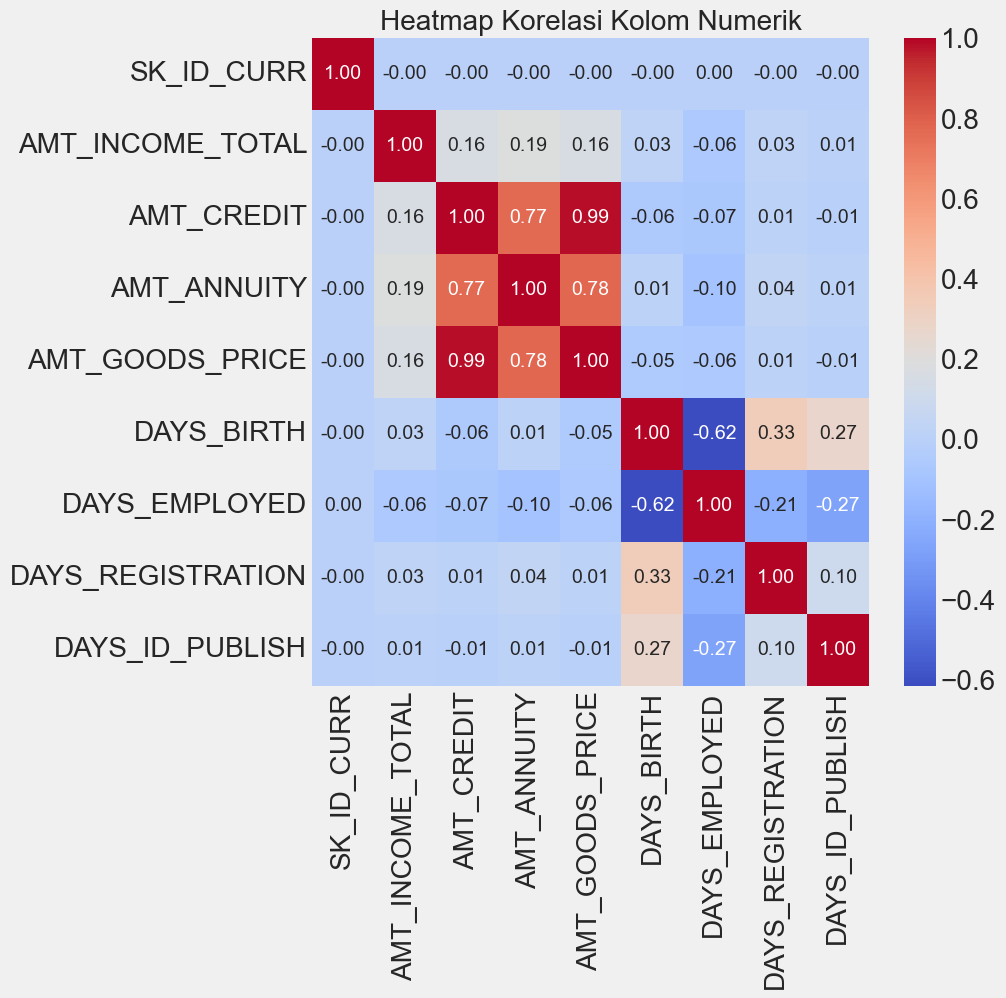

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()


## Korelasi yang Signifikan:

1. **AMT_CREDIT dan AMT_GOODS_PRICE (korelasi 0.99)**:  
   Korelasi yang sangat kuat antara jumlah kredit dan harga barang ini cukup logis, karena nilai kredit biasanya sangat terkait dengan harga barang yang dibiayai. Kedua fitur ini penting dan **perlu dipertahankan** dalam analisis selanjutnya.

2. **AMT_CREDIT dan AMT_ANNUITY (korelasi 0.77)**:  
   Hubungan kuat antara nilai kredit dan jumlah annuitas menunjukkan bahwa cicilan annuitas berkorelasi erat dengan jumlah kredit yang diberikan. **Kedua fitur ini sangat relevan** untuk mempertahankan analisis pembayaran.

3. **AMT_ANNUITY dan AMT_GOODS_PRICE (korelasi 0.78)**:  
   Korelasi ini juga mengindikasikan bahwa annuitas dan harga barang sangat terhubung, karena pembayaran cicilan biasanya berdasarkan harga barang yang dibeli. **Fitur ini harus dipertahankan**.

## Fitur dengan Korelasi Lebih Rendah:

1. **DAYS_BIRTH dan DAYS_EMPLOYED (korelasi -0.62)**:  
   Korelasi negatif ini menunjukkan bahwa semakin tua nasabah, semakin sedikit waktu yang mereka habiskan dalam pekerjaan. Kedua fitur ini tetap **penting** untuk analisis lebih lanjut, terutama untuk memahami profil demografi dan riwayat pekerjaan.

2. **DAYS_REGISTRATION dan DAYS_BIRTH (korelasi 0.33)**:  
   Hubungan yang lemah antara waktu registrasi dan usia ini menunjukkan bahwa kedua fitur tidak terlalu berkaitan, tetapi tetap relevan untuk analisis historis dan profil demografi.

3. **SK_ID_CURR dan fitur lainnya (korelasi mendekati 0)**:  
   Seperti yang diharapkan, **SK_ID_CURR** tidak memiliki hubungan yang signifikan dengan fitur lain karena berfungsi sebagai pengidentifikasi unik. Fitur ini tidak relevan untuk analisis korelasi, tetapi **perlu dipertahankan** untuk identifikasi nasabah.

## Kesimpulan:

Fitur yang paling relevan dan **harus dipertahankan** untuk analisis lebih lanjut adalah:
1. **AMT_CREDIT** dan **AMT_GOODS_PRICE** (karena korelasi yang sangat kuat dan relevansi bisnis).
2. **AMT_CREDIT** dan **AMT_ANNUITY** (hubungan erat dalam konteks pembayaran cicilan).
3. **AMT_ANNUITY** dan **AMT_GOODS_PRICE** (keterkaitan antara harga barang dan cicilan).

Fitur dengan korelasi lebih rendah yang tetap **perlu diperhatikan**:
- **DAYS_BIRTH** dan **DAYS_EMPLOYED** (penting untuk memahami profil nasabah dan riwayat pekerjaan).

Fitur yang dapat **diabaikan** dalam analisis prediktif, namun penting untuk identifikasi:
- **SK_ID_CURR** (tidak relevan dalam analisis korelasi, tetapi penting sebagai pengidentifikasi unik).


# 3B Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Berdasarkan heatmap korelasi yang telah dianalisis, berikut adalah beberapa pola menarik antara fitur-fitur dalam dataset dan langkah-langkah yang bisa diambil terkait fitur-fitur tersebut.

## Pola yang Menarik di Korelasi Antar-Feature:

**AMT_CREDIT dan AMT_GOODS_PRICE (korelasi 0.99)**:  
- **Polanya**: Korelasi ini sangat kuat, menunjukkan bahwa semakin tinggi harga barang yang dibiayai, semakin tinggi pula jumlah kredit yang diberikan. Pola ini cukup jelas, karena nilai kredit biasanya terkait langsung dengan harga barang yang dibeli.
- **Tindakan**: Meskipun korelasi sangat tinggi, keduanya tetap penting dan **perlu dipertahankan**. Harga barang dan nilai kredit memiliki relevansi bisnis yang berbeda, sehingga keduanya bisa memberikan nilai tambah dalam analisis atau prediksi.

**AMT_CREDIT dan AMT_ANNUITY (korelasi 0.77)**:  
- **Polanya**: Hubungan antara nilai kredit dan jumlah annuitas menunjukkan bahwa semakin besar kredit, semakin besar pula cicilan annuitas yang harus dibayar. Pola ini penting untuk memahami beban keuangan nasabah.
- **Tindakan**: Karena keduanya berperan penting dalam analisis keuangan, **keduanya harus dipertahankan** dalam analisis dan model prediksi.

**AMT_ANNUITY dan AMT_GOODS_PRICE (korelasi 0.78)**:  
- **Polanya**: Korelasi yang tinggi antara annuitas dan harga barang menunjukkan bahwa cicilan annuitas sangat dipengaruhi oleh harga barang yang dibeli, yang juga berkaitan dengan besarnya kredit.
- **Tindakan**: Seperti fitur sebelumnya, **kedua fitur ini harus dipertahankan** karena relevansi bisnisnya yang jelas.

**DAYS_BIRTH dan DAYS_EMPLOYED (korelasi -0.62)**:  
- **Polanya**: Korelasi negatif menunjukkan bahwa semakin tua nasabah, semakin sedikit waktu mereka bekerja. Pola ini cukup logis dan memberikan wawasan tentang riwayat pekerjaan nasabah berdasarkan usia.
- **Tindakan**: Kedua fitur ini **perlu dipertahankan** karena memberikan informasi penting terkait demografi dan riwayat pekerjaan nasabah.

**DAYS_REGISTRATION dan DAYS_BIRTH (korelasi 0.33)**:  
- **Polanya**: Korelasi yang lemah antara waktu registrasi dan usia nasabah menunjukkan bahwa kedua fitur ini tidak berkaitan secara langsung. Meskipun begitu, mereka tetap relevan untuk analisis demografis dan historis.
- **Tindakan**: **Kedua fitur ini tetap relevan** dan harus dipertahankan untuk analisis yang lebih mendalam terkait profil nasabah.

**SK_ID_CURR dan fitur lainnya (korelasi mendekati 0)**:  
- **Polanya**: Korelasi rendah menunjukkan bahwa **SK_ID_CURR** hanyalah pengidentifikasi unik tanpa hubungan langsung dengan fitur lainnya.
- **Tindakan**: Fitur ini tidak relevan untuk analisis korelasi, tetapi **harus dipertahankan** untuk tujuan identifikasi nasabah.

## Kesimpulan Tindakan untuk Antar-Feature:

**Pertahankan**:
- **AMT_CREDIT** dan **AMT_GOODS_PRICE** karena meskipun korelasinya sangat tinggi, keduanya berhubungan erat dengan konteks bisnis dan perlu dipertahankan.
- **AMT_CREDIT** dan **AMT_ANNUITY** karena keduanya memberikan wawasan yang berbeda dalam analisis keuangan.
- **DAYS_BIRTH** dan **DAYS_EMPLOYED** karena keduanya penting untuk memahami profil nasabah dan riwayat pekerjaan.

**Pertimbangkan untuk diabaikan dalam pemodelan prediktif**:
- **SK_ID_CURR**, karena hanya berfungsi sebagai pengidentifikasi unik dan tidak memberikan kontribusi prediktif.

## Langkah Selanjutnya:

- **Multikolinearitas**: Saat membuat model prediksi, pastikan tidak ada fitur yang sangat berkorelasi yang bisa menyebabkan multikolinearitas. Meskipun fitur seperti **AMT_CREDIT** dan **AMT_GOODS_PRICE** memiliki korelasi yang tinggi, pastikan untuk mempertimbangkan relevansi bisnisnya sebelum menghapus salah satu.
- **Feature Engineering**: Buat fitur baru berdasarkan kombinasi fitur, seperti menghitung selisih antara **AMT_CREDIT** dan **AMT_GOODS_PRICE**, untuk memahami apakah kredit yang diberikan melebihi atau sesuai dengan harga barang.


# 4. Business Insight

### Business Insight Berdasarkan Beberapa Distribusi dan Grafik

#### 1. **Distribusi Jumlah Kredit yang Diajukan (AMT_CREDIT)**
Pertama, kita akan melihat distribusi jumlah kredit yang diajukan oleh nasabah untuk memahami apakah ada pola tertentu dalam besaran pinjaman yang diajukan.

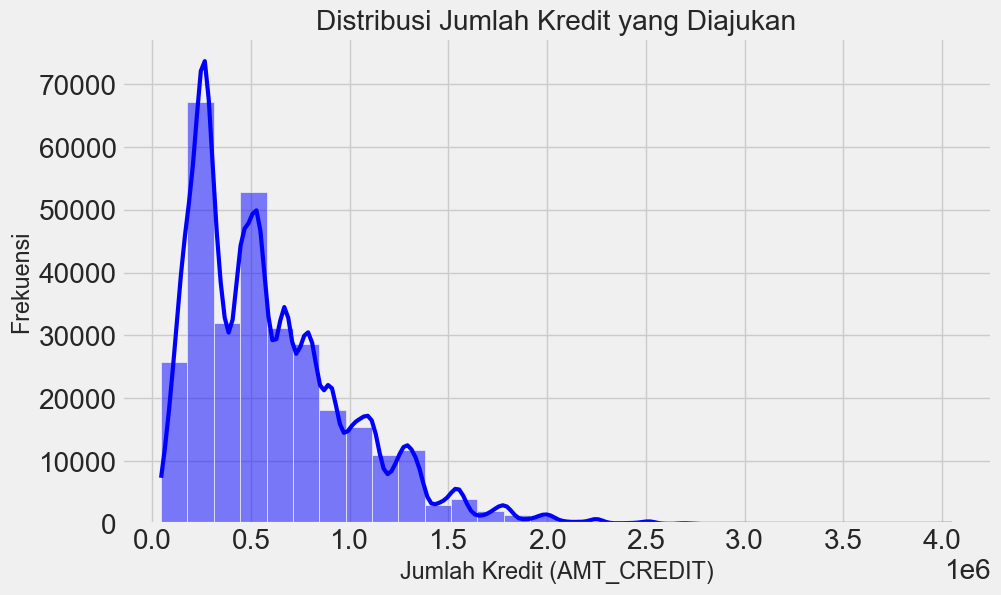

In [47]:
# Membuat histogram untuk distribusi jumlah kredit
plt.figure(figsize=(10, 6))
sns.histplot(data['AMT_CREDIT'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Kredit yang Diajukan')
plt.xlabel('Jumlah Kredit (AMT_CREDIT)')
plt.ylabel('Frekuensi')
plt.show()


**Insight 1**: Sebagian besar nasabah mengajukan kredit di bawah 500 ribu

**Hasil**: Sebagian besar nasabah mengajukan kredit dalam jumlah relatif kecil (di bawah 500 ribu), sementara hanya sedikit nasabah yang mengajukan kredit di atas 1 juta.

**Rekomendasi Bisnis**: Fokuskan strategi produk kredit pada segmen nasabah yang mengajukan pinjaman kecil. Misalnya, tawarkan kredit mikro dengan bunga yang lebih kompetitif atau produk yang disesuaikan untuk segmen ini.

**2. Hubungan Pendapatan Nasabah dan Jumlah Kredit (AMT_INCOME_TOTAL vs AMT_CREDIT)**

Untuk memahami lebih lanjut pola pengajuan kredit, kita juga mengeksplorasi hubungan antara jumlah kredit yang diajukan dengan pendapatan nasabah.

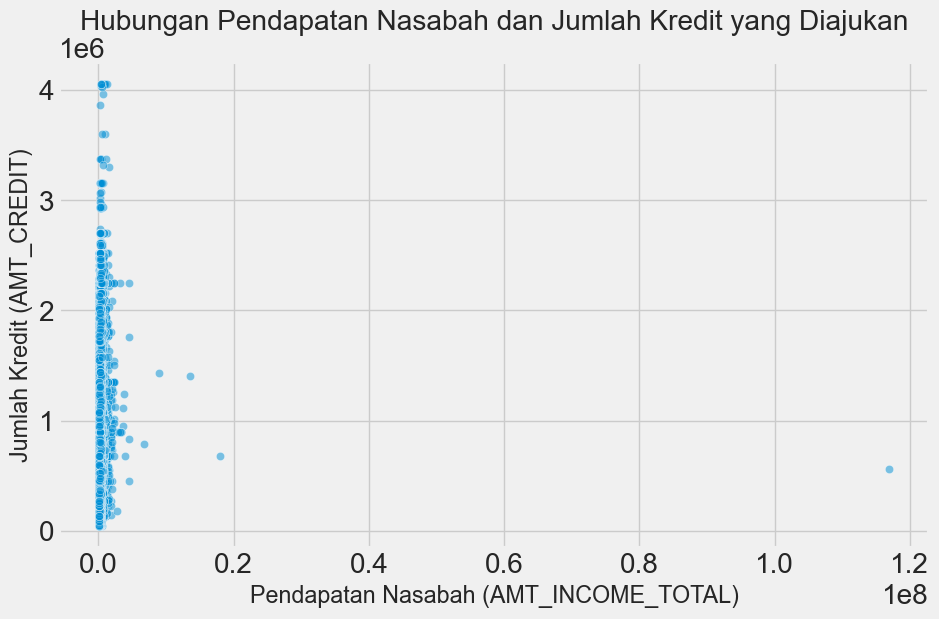

In [50]:
# Scatter plot untuk hubungan antara AMT_CREDIT dan AMT_INCOME_TOTAL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=data, alpha=0.5)
plt.title('Hubungan Pendapatan Nasabah dan Jumlah Kredit yang Diajukan')
plt.xlabel('Pendapatan Nasabah (AMT_INCOME_TOTAL)')
plt.ylabel('Jumlah Kredit (AMT_CREDIT)')
plt.show()


**Insight 2**: Nasabah dengan pendapatan tinggi cenderung mengajukan kredit lebih besar

**Hasil**: Ada kecenderungan bahwa nasabah dengan pendapatan lebih tinggi mengajukan kredit lebih besar, meskipun beberapa nasabah dengan pendapatan rendah juga mengajukan kredit besar.

**Rekomendasi Bisnis:** Lakukan verifikasi pendapatan secara ketat untuk nasabah dengan pendapatan rendah yang mengajukan kredit besar, untuk menghindari risiko gagal bayar.

**3. Distribusi Usia Nasabah (DAYS_BIRTH)**
Analisis distribusi usia nasabah untuk melihat segmen usia yang paling aktif dalam pengajuan kredit.

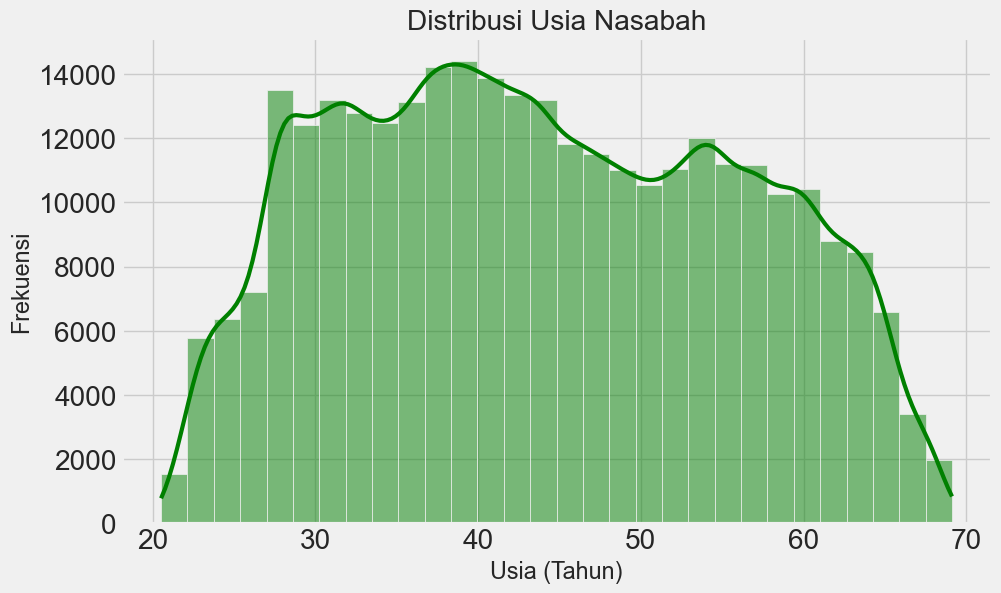

In [51]:
# Mengubah DAYS_BIRTH menjadi usia dalam tahun
data['AGE_YEARS'] = data['DAYS_BIRTH'] / -365

# Histogram distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE_YEARS'], bins=30, kde=True, color='green')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Frekuensi')
plt.show()


**Insight 3:** 
Sebagian besar nasabah berada di rentang usia 30-50 tahun

**Hasil:** Sebagian besar nasabah yang mengajukan kredit berada di rentang usia 30-50 tahun.

**Rekomendasi Bisnis:** Fokuskan pemasaran produk kredit pada segmen usia 30-50 tahun, misalnya untuk kredit perumahan atau kendaraan.


**4. Hubungan Lama Bekerja dan Jumlah Kredit (DAYS_EMPLOYED vs AMT_CREDIT)**

Selanjutnya, kita akan mengeksplorasi hubungan antara lama bekerja dan jumlah kredit yang diajukan.

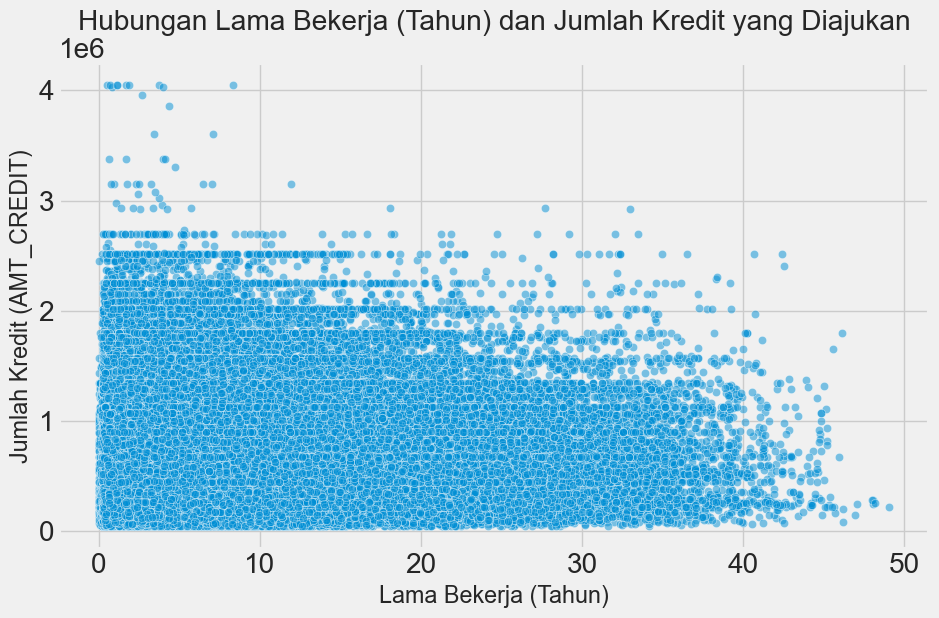

In [54]:
# Mengonversi nilai negatif menjadi positif dan dalam satuan tahun
filtered_data['YEARS_EMPLOYED'] = filtered_data['DAYS_EMPLOYED'].abs() / 365

# Scatter plot untuk hubungan lama bekerja (dalam tahun) dan jumlah kredit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YEARS_EMPLOYED', y='AMT_CREDIT', data=filtered_data, alpha=0.5)
plt.title('Hubungan Lama Bekerja (Tahun) dan Jumlah Kredit yang Diajukan')
plt.xlabel('Lama Bekerja (Tahun)')
plt.ylabel('Jumlah Kredit (AMT_CREDIT)')
plt.show()


**Insight 4:** Nasabah dengan riwayat kerja lebih lama cenderung mengajukan kredit lebih besar

**Hasil:** Nasabah yang bekerja lebih lama cenderung mengajukan kredit dalam jumlah lebih besar, menunjukkan hubungan antara stabilitas pekerjaan dan kepercayaan dalam pengajuan kredit.
    
**Rekomendasi Bisnis:** Berikan penawaran kredit dengan bunga rendah dan tenor lebih panjang kepada nasabah yang memiliki riwayat kerja yang stabil.

### 5 Rekomendasi Bisnis

Berdasarkan beberapa insight yang telah kita temukan dari analisis di atas, berikut adalah lima rekomendasi bisnis yang dapat diterapkan:

1. **Penawaran Kredit Mikro untuk Nasabah Berpendapatan Rendah**:
   - Mengingat banyak nasabah mengajukan kredit dalam jumlah kecil, tawarkan produk kredit mikro dengan bunga yang lebih rendah dan tenor yang lebih fleksibel.

2. **Verifikasi Pendapatan untuk Nasabah dengan Pengajuan Kredit Besar**:
   - Lakukan verifikasi lebih ketat untuk nasabah dengan penghasilan rendah yang mengajukan kredit besar. Hal ini untuk meminimalkan risiko gagal bayar yang lebih tinggi.

3. **Pemasaran Kredit Berdasarkan Segmentasi Usia**:
   - Fokuskan kampanye pemasaran kepada nasabah berusia 30-50 tahun, yang merupakan segmen terbesar. Penawaran kredit perumahan dan kendaraan dapat lebih menarik minat mereka.

4. **Penawaran Khusus bagi Nasabah dengan Lama Kerja Stabil**:
   - Nasabah yang bekerja lebih lama cenderung lebih stabil secara finansial. Berikan mereka penawaran kredit dengan tenor yang lebih panjang atau bunga yang lebih rendah.

5. **Penyusunan Produk Berdasarkan Riwayat Kerja dan Profil Pendapatan**:
   - Berdasarkan riwayat pekerjaan dan pendapatan, susun produk kredit yang lebih personal sesuai kebutuhan nasabah, misalnya refinancing untuk nasabah berpenghasilan rendah tetapi memiliki riwayat pekerjaan yang baik.


### Kesimpulan dari Business Insights

1. **Sebagian besar nasabah mengajukan kredit kecil**, sehingga fokus pada produk kredit mikro dengan bunga rendah akan efektif.
   
2. **Nasabah dengan pendapatan lebih tinggi cenderung mengajukan kredit besar**, tetapi perlu ada verifikasi ketat bagi nasabah berpenghasilan rendah yang mengajukan pinjaman besar.

3. **Rentang usia 30-50 tahun merupakan segmen terbesar yang mengajukan kredit**, sehingga produk kredit yang sesuai dengan gaya hidup mereka seperti kredit perumahan atau kendaraan harus difokuskan.

4. **Nasabah dengan riwayat kerja yang stabil cenderung mengajukan kredit lebih besar**, sehingga penawaran kredit fleksibel bagi mereka dapat membantu mempertahankan nasabah yang bernilai tinggi.

5. Dengan menerapkan strategi ini, perusahaan dapat **meningkatkan efektivitas penawaran produk kredit dan mengurangi risiko gagal bayar** secara keseluruhan.
